In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk import ngrams
from collections import Counter
from nltk.stem import WordNetLemmatizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold


In [2]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not",
                       "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                       "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", 
                       "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                       "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                       "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                       "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
                       "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have" }

In [3]:
def split_textnum(text):
    '''
    To seperate numbers from the words.
    
    Input - Word
    
    Returns - Number seperated list of items.
    '''
    match = re.match(r"([a-z]+)([0-9]+)", text, re.I)
    if match:
        items = " ".join(list(match.groups()))
    else:
        match = re.match(r"([0-9]+)([a-z]+)", text, re.I)
        if match:
            items = " ".join(list(match.groups()))
        else:
            return text
    return (items)

In [4]:
def clean_text(text): 
            
    # Special characters
    text = re.sub(r"%20", " ", text)
    #text = text.replace(r".", " ")
    text = text.replace(r"@", " ")
    text = text.replace(r"#", " ")
    #text = text.replace(r":", " ")
    text = text.replace(r"'", " ")
    text = text.replace(r"\x89û_", " ")
    text = text.replace(r"??????", " ")
    text = text.replace(r"\x89ûò", " ")
    text = text.replace(r"16yr", "16 year")
    text = text.replace(r"re\x89û_", " ")
    
    text = text.replace(r"mh370", " ")
    text = text.replace(r"prebreak", "pre break")
    text = re.sub(r"\x89û", " ", text)
    text = re.sub(r"re\x89û", "re ", text)
    text = text.replace(r"nowplaying", "now playing")
    text = re.sub(r"\x89ûª", "'", text)
    text = re.sub(r"\x89û", " ", text)
    text = re.sub(r"\x89ûò", " ", text)
    
    
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r"ªs", " ", text)
    text = re.sub(r"ª", " ", text)
    text = re.sub(r"\x9d", " ", text)
    text = re.sub(r"ò", " ", text)
    text = re.sub(r"ªt", " ", text)
    text = re.sub(r"ó", " ", text)
    text = text.replace(r"11yearold", "11 year old")
    text = re.sub(r"typhoondevastated", "typhoon devastated", text)
    text = re.sub(r"bestnaijamade", "best nijamade", text)
    text = re.sub(r"gbbo", "The Great British Bake Off", text)
    text = re.sub(r"ï", "", text)
    text = re.sub(r"ïwhen", "when", text)
    text = re.sub(r"selfimage", "self image", text)
    text = re.sub(r"20150805", "2015 08 05", text)
    text = re.sub(r"20150806", "2015 08 06", text)
    text = re.sub(r"subreddits", "website for weird public sentiment", text)
    text = re.sub(r"disea", "chinese famous electronic company", text)
    text = re.sub(r"lmao", "funny", text)
    text = text.replace(r"companyse", "company")
    
    text = text.replace(r"worldnews", "world news")
    text = text.replace(r"animalrescue", "animal rescue")
    text = text.replace(r"freakiest", "freak")
    
    text = text.replace(r"irandeal", "iran deal")
    text = text.replace(r"directioners", "mentor")
    text = text.replace(r"justinbieber", "justin bieber")
    text = text.replace(r"okwx", "okay")
    text = text.replace(r"trapmusic", "trap music")
    text = text.replace(r"djicemoon", "music ice moon")
    text = text.replace(r"icemoon", "ice moon")
    text = text.replace(r"mtvhottest", "tv hottest")
    text = text.replace(r"rì©union", "reunion")
    text = text.replace(r"abcnews", "abc news")
    text = text.replace(r"tubestrike", "tube strike")
    text = text.replace(r"prophetmuhammad", "prophet muhammad muslim dharma")
    text = text.replace(r"chicagoarea", "chicago area")
    text = text.replace(r"yearold", "year old")
    text = text.replace(r"meatloving", "meat love")
    text = text.replace(r"standuser", "standard user")
    text = text.replace(r"pantherattack", "panther attack")
    text = text.replace(r"youngheroesid", "young hearos id")
    text = text.replace(r"idk", "i do not know")
    text = text.replace(r"usagov", "united state of america government")
    text = text.replace(r"injuryi", "injury")
    text = text.replace(r"summerfate", "summer fate")
    text = text.replace(r"kerricktrial", "kerrick trial")
    text = text.replace(r"viralspell", "viral spell")
    text = text.replace(r"collisionno", "collision")
    text = text.replace(r"socialnews", "social news")
    text = text.replace(r"nasahurricane", "nasa hurricane")
    text = text.replace(r"strategicpatience", "strategic patience")
    text = text.replace(r"explosionproof", "explosion proof")
    text = text.replace(r"selfies", "photo")
    text = text.replace(r"selfie", "photo")
    text = text.replace(r"worstsummerjob", "worst summer job")
    text = text.replace(r"realdonaldtrump", "real america president")
    text = text.replace(r"omfg", "oh my god")
    text = text.replace(r"japìn", "japan")
    text = text.replace(r"breakingnews", "breaking news")
    
    text = " ".join([split_textnum(word) for word in text.split(" ")])
    
    text = "".join([c if c not in string.punctuation else "" for c in text])
    text = ''.join(c for c in text if not c.isdigit())
    text = text.replace(r"÷", "")
    
    text = re.sub(' +', ' ', text)
    # text = text.encode('utf-8')
    return text

In [5]:
def data_clean(data):

  data['tweet'] = data['tweet'].apply(lambda x : " ".join([contraction_mapping[word].lower() 
                      if word in contraction_mapping.keys() else word.lower() for word in x.split(" ")]))

  lemmatizer = WordNetLemmatizer()
  data['tweet'] = data['tweet'].apply(lambda x : "".join([lemmatizer.lemmatize(word) 
                                                                              for word in x]))
  return data



In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ashik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
data_antd = pd.read_csv("data/covid_related_tf_only.csv", encoding = "ISO-8859-1" ,index_col=False)
data_antd['covid_related'] = data_antd['covid_related'].astype(int)
data_antd = data_clean(data_antd)

In [31]:
data_osome_full = pd.read_csv("data/2020-02_tweets.csv")
data_osome = data_osome_full[['tweet']]
data_osome['covid_related'] = [False]*len(data_osome)
data_osome['covid_related'] = data_osome['covid_related'].astype(int)
data_osome = data_clean(data_osome)

<ipython-input-31-a51969583009>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_osome['covid_related'] = [False]*len(data_osome)
<ipython-input-31-a51969583009>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_osome['covid_related'] = data_osome['covid_related'].astype(int)
<ipython-input-5-59de3e4b408a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [32]:

data_antd_true = data_antd[data_antd['covid_related'] == 1] 
data_antd_false = data_antd[data_antd['covid_related'] == 0] 

print(pd.value_counts(data_antd_true['covid_related']))
print(pd.value_counts(data_antd_false['covid_related']))

1    9364
Name: covid_related, dtype: int64
0    728
Name: covid_related, dtype: int64


In [33]:
l_true = len(data_antd_true)
l_false = len(data_antd_false)
l_osome = len(data_osome)

df_train = data_antd_true[:l_true//2].append(data_antd_false[:l_false//2]).append(data_osome[:(l_true-l_false)//2])
df_train = df_train.sample(frac=1, random_state= 24).reset_index(drop=True)
print('Train dataset value count\n{}\n'.format(pd.value_counts(df_train['covid_related'])))

df_test = data_antd_true[l_true//2:].append(data_antd_false[l_false//2:])
df_test = df_test.sample(frac=1, random_state= 24).reset_index(drop=True)
print('Test dataset value count\n{}\n'.format(pd.value_counts(df_test['covid_related'])))

Train dataset value count
1    4682
0    4682
Name: covid_related, dtype: int64

Test dataset value count
1    4682
0     364
Name: covid_related, dtype: int64



In [34]:
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

def countVectorizer(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

In [35]:
#Bag of Words embeddings
X_train_counts, count_vectorizer = cv(df_train['tweet'])
X_test_counts = count_vectorizer.transform(df_test['tweet'])

#TF-IDF embeddings
X_train_tfidf, tfidf_vectorizer = tfidf(df_train['tweet'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['tweet'])

In [36]:
pickle.dump(X_train_counts, open("data/train_count.pickle", "wb"))
pickle.dump(X_train_tfidf, open("data/train_tfidf.pickle", "wb"))

pickle.dump(X_test_counts, open("data/test_count.pickle", "wb"))
pickle.dump(X_test_tfidf, open("data/test_tfidf.pickle", "wb"))

pickle.dump(df_train['covid_related'], open("data/y_train.pickle", "wb"))
pickle.dump(df_test['covid_related'], open("data/y_test.pickle", "wb"))

pickle.dump(count_vectorizer, open("data/count_vectorizer.pickle", "wb"))
pickle.dump(tfidf_vectorizer, open("data/tfidf_vectorizer.pickle", "wb"))

In [37]:
X_train_counts = pickle.load(open("data/train_count.pickle", "rb"))
X_train_tfidf = pickle.load(open("data/train_tfidf.pickle", "rb"))

X_test_counts = pickle.load(open("data/test_count.pickle", "rb"))
X_test_tfidf = pickle.load(open("data/test_tfidf.pickle", "rb"))

y_train = pickle.load(open("data/y_train.pickle", "rb"))
y_test = pickle.load(open("data/y_test.pickle", "rb"))

In [38]:
def get_auc_scores(clf, X_train, y_train, X_test, y_test):

    y_train_score = clf.predict_proba(X_train)[:,1]
    y_test_score = clf.predict_proba(X_test)[:,1]

    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)

    return auc_train, auc_test

Initializing ML models

In [53]:
svc = SVC(probability=True)
lsvc = LinearSVC()
mlpc = MLPClassifier()
rfc = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_split=2, random_state=0)
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=100,
                         random_state=0)

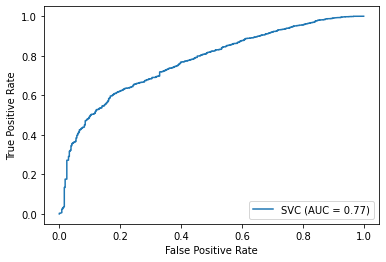

In [23]:
svc.fit(X_train_tfidf, y_train)
svc_plot = plot_roc_curve(svc, X_test_tfidf, y_test)

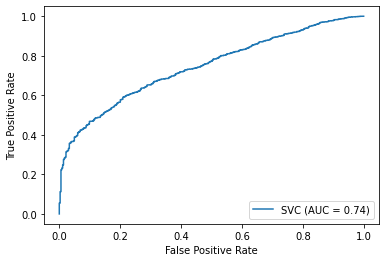

In [24]:
svc.fit(X_train_counts, y_train)
svc_plot = plot_roc_curve(svc, X_test_counts, y_test)

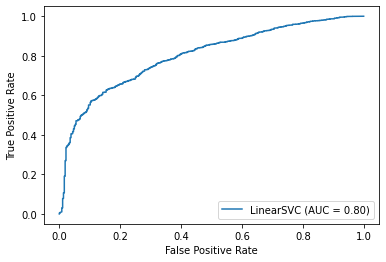

In [25]:
lsvc.fit(X_train_tfidf, y_train)
lsvc_plot = plot_roc_curve(lsvc, X_test_tfidf, y_test)

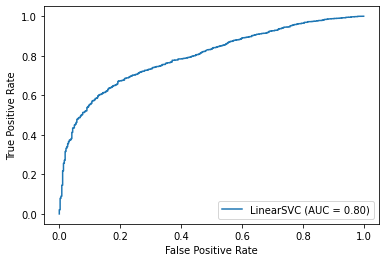

In [26]:
lsvc.fit(X_train_counts, y_train)
lsvc_plot = plot_roc_curve(lsvc, X_test_counts, y_test)

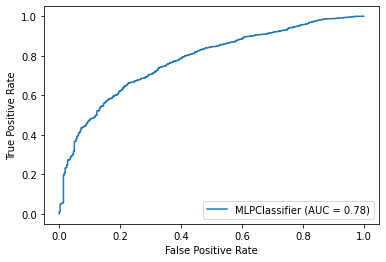

In [27]:
mlpc.fit(X_train_tfidf, y_train)
mlpc_plot = plot_roc_curve(mlpc, X_test_tfidf, y_test)

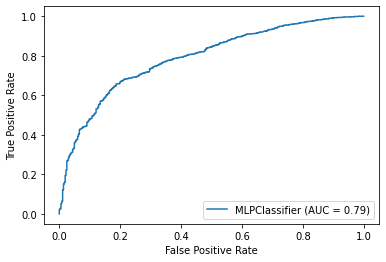

In [28]:
mlpc.fit(X_train_counts, y_train)
mlpc_plot = plot_roc_curve(mlpc, X_test_counts, y_test)

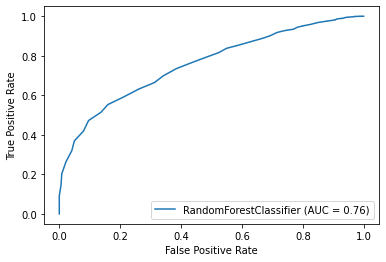

In [29]:
rfc.fit(X_train_tfidf, y_train)
rfc_plot = plot_roc_curve(rfc, X_test_tfidf, y_test)

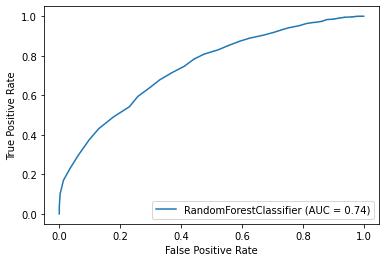

In [30]:
rfc.fit(X_train_counts, y_train)
rfc_plot = plot_roc_curve(rfc, X_test_counts, y_test)

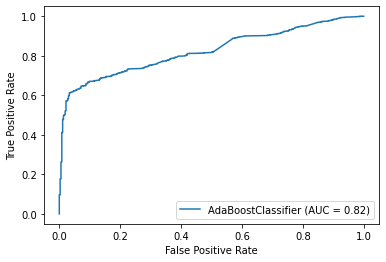

In [21]:
abc.fit(X_train_tfidf, y_train)
abc_plot = plot_roc_curve(abc, X_test_tfidf, y_test)

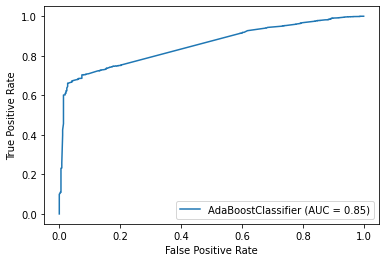

In [20]:
abc.fit(X_train_counts, y_train)
abc_plot = plot_roc_curve(abc, X_test_counts, y_test)

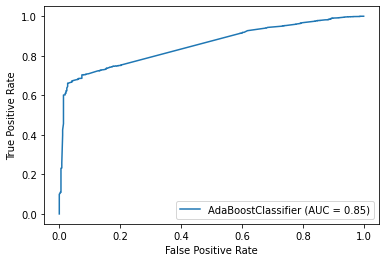

In [34]:
abc.fit(X_train_counts, y_train)
abc_plot = plot_roc_curve(abc, X_test_counts, y_test)

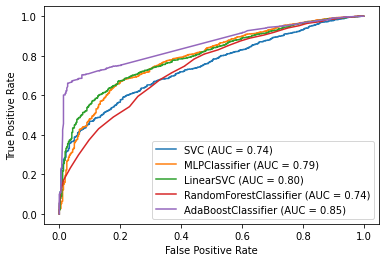

In [35]:
ax = plt.gca()
svc_plot.plot(ax=ax, alpha=1)
mlpc_plot.plot(ax=ax, alpha=1)
lsvc_plot.plot(ax=ax, alpha=1)
rfc_plot.plot(ax=ax, alpha=1)
abc_plot.plot(ax=ax, alpha=1)


### Without OSOME data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data_antd['tweet'], data_antd['covid_related'], test_size=0.25)

In [105]:
#Bag of Words embeddings
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

#TF-IDF embeddings
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

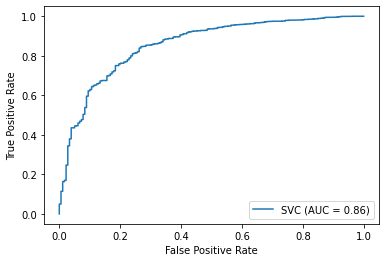

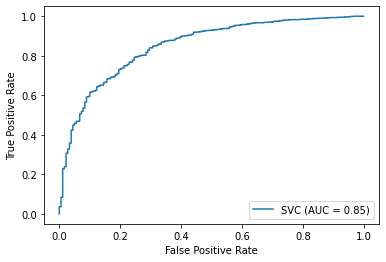

In [115]:
svc = SVC(probability=True)
svc.fit(X_train_tfidf, y_train)
svc_plot1 = plot_roc_curve(svc, X_test_tfidf, y_test)

svc = SVC(probability=True)
svc.fit(X_train_counts, y_train)
svc_plot2 = plot_roc_curve(svc, X_test_counts, y_test)

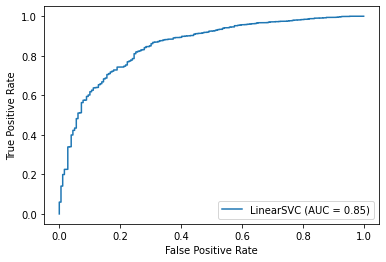

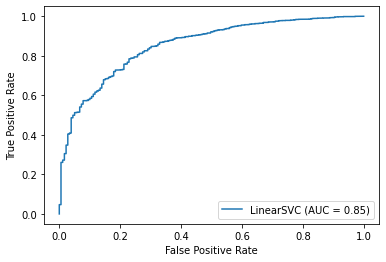

In [116]:
lsvc.fit(X_train_tfidf, y_train)
lsvc_plot1 = plot_roc_curve(lsvc, X_test_tfidf, y_test)

lsvc.fit(X_train_counts, y_train)
lsvc_plot2 = plot_roc_curve(lsvc, X_test_counts, y_test)

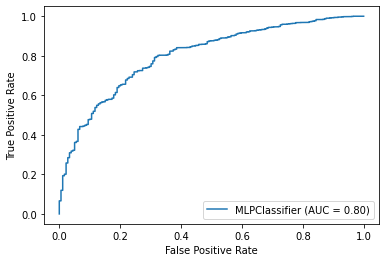

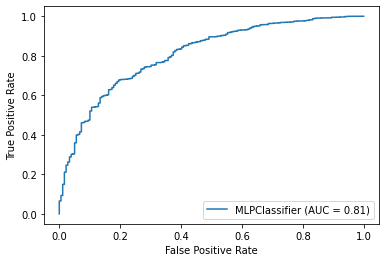

In [117]:
mlpc.fit(X_train_tfidf, y_train)
mlpc_plot1 = plot_roc_curve(mlpc, X_test_tfidf, y_test)

mlpc.fit(X_train_counts, y_train)
mlpc_plot2 = plot_roc_curve(mlpc, X_test_counts, y_test)

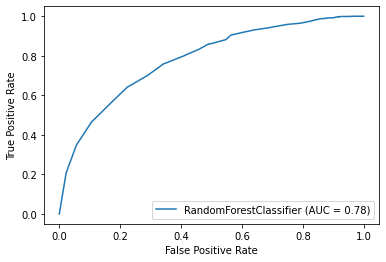

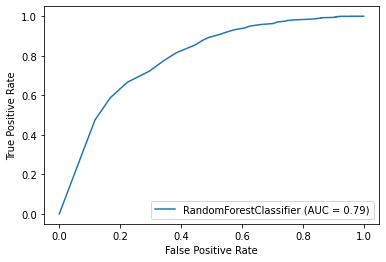

In [118]:
rfc.fit(X_train_tfidf, y_train)
rfc_plot1 = plot_roc_curve(rfc, X_test_tfidf, y_test)

rfc.fit(X_train_counts, y_train)
rfc_plot2 = plot_roc_curve(rfc, X_test_counts, y_test)

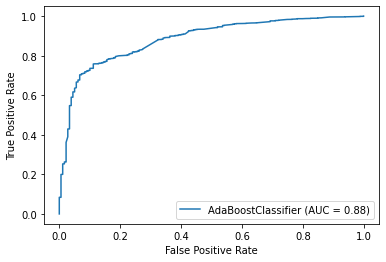

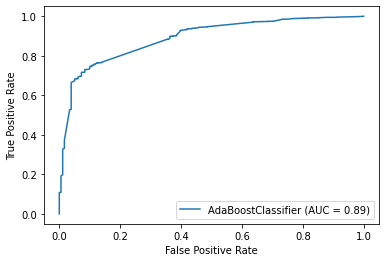

In [119]:
abc.fit(X_train_tfidf, y_train)
abc_plot1 = plot_roc_curve(abc, X_test_tfidf, y_test)

abc.fit(X_train_counts, y_train)
abc_plot2 = plot_roc_curve(abc, X_test_counts, y_test)

TF-IDF embeddings

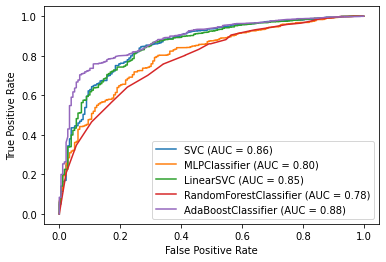

In [123]:
ax = plt.gca()
svc_plot1.plot(ax=ax, alpha=1)
mlpc_plot1.plot(ax=ax, alpha=1)
lsvc_plot1.plot(ax=ax, alpha=1)
rfc_plot1.plot(ax=ax, alpha=1)
abc_plot1.plot(ax=ax, alpha=1)


Bag-of-Words embeddings

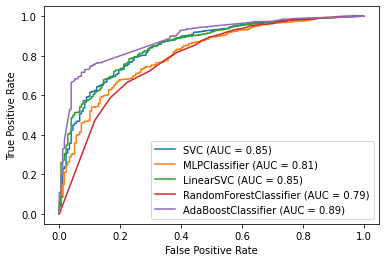

In [124]:
ax = plt.gca()
svc_plot2.plot(ax=ax, alpha=1)
mlpc_plot2.plot(ax=ax, alpha=1)
lsvc_plot2.plot(ax=ax, alpha=1)
rfc_plot2.plot(ax=ax, alpha=1)
abc_plot2.plot(ax=ax, alpha=1)


### K-fold cross validation


In [44]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


In [45]:
X=data_antd['tweet']
y = data_antd['covid_related']

In [63]:
def plot_KFold(classifier, classfier_label, X, y):

    random_state = np.random.RandomState(0)
    cv = StratifiedKFold(n_splits=6)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):

        X_train_counts_, count_vectorizer_ = countVectorizer(X[train])
        X_test_counts_ = count_vectorizer_.transform(X[test])

        classifier.fit(X_train_counts_, y[train])
        viz = plot_roc_curve(classifier, X_test_counts_, y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="ROC: {}".format(classfier_label))
    ax.legend(loc="lower right")
    plt.savefig('abc_kfold.jpg')
    plt.show()

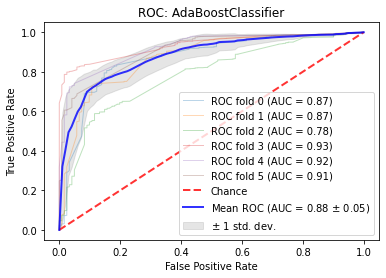

In [64]:
plot_KFold(classifier=abc, classfier_label='AdaBoostClassifier', X=X, y=y)

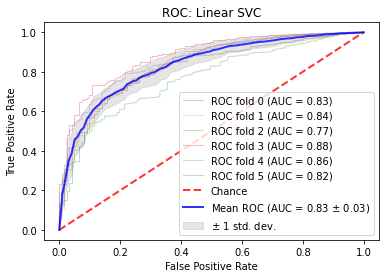

In [57]:
plot_KFold(classifier=lsvc, classfier_label='Linear SVC', X=X, y=y)

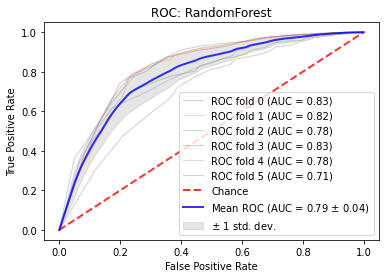

In [58]:
plot_KFold(classifier=rfc, classfier_label='RandomForest', X=X, y=y)

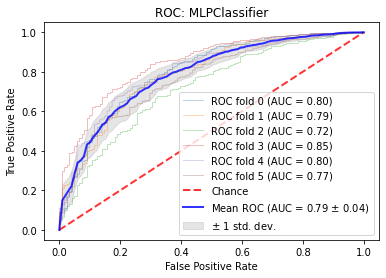

In [62]:
plot_KFold(classifier=mlpc, classfier_label='MLPClassifier', X=X, y=y)